<a href="https://colab.research.google.com/github/Devendarreddybathini/Devendarreddy_INFO5731_spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium






Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,069 kB]
Get:14 htt

In [2]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.imdb.com/title/tt1877830/reviews?ref_=tt_urv"
reviews = []

while len(reviews) < 1000:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    review_divs = soup.find_all('div', class_='lister-item-content')

    for review_div in review_divs:
        review = review_div.find('div', class_='text').get_text().strip()
        reviews.append(review)

        if len(reviews) == 1000:
            break

    next_button = soup.find('div', class_='load-more-data')
    if not next_button:
        break

    next_data_key = next_button['data-key']
    url = f'https://www.imdb.com/title/tt1877830/reviews/_ajax?paginationKey={next_data_key}'

df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('movie_reviews.csv', index=False)
print(df.head(10))

                                              Review
0  Detective Batman at its peak! Great storyline....
1  I just got out of The BatmanThis movie really ...
2  I have been absolutely fizzing to see 'The Bat...
3  Matt Reeves' long-awaited Batman reboot has in...
4  The Riddler(Paul Dano, spot-on. How did it tak...
5  Everything about this movie is trying too hard...
6  STAR RATING: ***** Brilliant **** Very Good **...
7  I'm not sure where to begin as I don't general...
8  Matt Reeves The Batman is a hell of a movie, i...
9  Wasn't a fan of Emo Batman. Sorry Robert Patti...


In [46]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('large_grammars')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package large_grammars to /root/nltk_data...
[nltk_data]   Package large_grammars is already up-to-date!


True

In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Load CSV file
df = pd.read_csv('movie_reviews.csv')

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Define cleaning function
def clean_text(text):
    # Remove special characters and punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Remove numbers
    text = re.sub('[0-9]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = text.split()

    # Remove stopwords and stem/lemmatize words
    clean_words = []
    for word in words:
        if word not in stop_words:
            # Stemming
            #clean_words.append(stemmer.stem(word))
            # Lemmatization
            clean_words.append(lemmatizer.lemmatize(word))
    
    # Join words back into text
    clean_text = ' '.join(clean_words)

    return clean_text

# Apply cleaning function to 'text' column and save to new column 'clean_text'
df['clean_text'] = df['Review'].apply(clean_text)

# Save cleaned data to CSV file
df.to_csv('movie_reviews.csv', index=False)


print(df.head(10))

                                              Review  \
0  Detective Batman at its peak! Great storyline....   
1  I just got out of The BatmanThis movie really ...   
2  I have been absolutely fizzing to see 'The Bat...   
3  Matt Reeves' long-awaited Batman reboot has in...   
4  The Riddler(Paul Dano, spot-on. How did it tak...   
5  Everything about this movie is trying too hard...   
6  STAR RATING: ***** Brilliant **** Very Good **...   
7  I'm not sure where to begin as I don't general...   
8  Matt Reeves The Batman is a hell of a movie, i...   
9  Wasn't a fan of Emo Batman. Sorry Robert Patti...   

                                          clean_text  
0  detective batman peak great storyline dark uni...  
1  got batmanthis movie really everyone easily da...  
2  absolutely fizzing see batman day announced ev...  
3  matt reef long awaited batman reboot many way ...  
4  riddler paul dano spot take long get role like...  
5  everything movie trying hard dramatic score lo... 

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['clean_text']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [13]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('director', 'matt', 'reef'): 20, ('batman', 'bruce', 'wayne'): 18, ('paul', 'dano', 'riddler'): 16, ('dark', 'knight', 'trilogy'): 14, ('batman', 'movie', 'ever'): 11, ('car', 'chase', 'scene'): 11, ('robert', 'pattinson', 'batman'): 10, ('riddler', 'paul', 'dano'): 10, ('bruce', 'wayne', 'batman'): 10, ('heath', 'ledger', 'joker'): 10, ...})

In [14]:
#1.2 - Probability of Bi grams
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('bothered', 'violence'):0.25
('violence', 'beginning'):0.1111111111111111
('beginning', 'film'):0.047619047619047616
('film', 'progressed'):0.001644736842105263
('progressed', 'made'):1.0
('sense', 'glaring'):0.02127659574468085
('glaring', 'mistake'):0.3333333333333333
('mistake', 'pattinson'):0.058823529411764705
('wayne', 'ok'):0.005154639175257732
('would', 'billionaire'):0.004878048780487805
('billionaire', 'greasy'):0.09090909090909091
('greasy', 'long'):0.5
('long', 'hair'):0.004098360655737705
('hair', 'covering'):0.1
('covering', 'face'):0.3333333333333333
('face', 'made'):0.023809523809523808
('like', 'derelict'):0.0017331022530329288
('derelict', 'overlong'):1.0
('overlong', 'movie'):0.5
('movie', 'ridiculous'):0.0015760441292356187
('ridiculous', 'ending'):0.04
('ending', 'obvious'):0.03333333333333333
('obvious', 'planning'):0.05263157894736842
('planning', 'sequel'):0.3333333333333333
('sequel', 'two'):0.03125
('two', 'v

In [15]:
#1.3 Noun Phrases and relative probabilities of each review in terms of other reviews
whole_dataset = ''
index = []
i = 1
for line in df['clean_text']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [16]:
#1.3 Noun Phrases and relative probabilities of each review in terms of other reviews
whole_dataset = ''
index = []
i = 1
for line in df['clean_text']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [18]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [20]:
from textblob import TextBlob
import pandas as pd

noun_phrases = []
frequency = []
whole_dataset = ' '.join(df['clean_text']) # concatenate all the text into a single string
for line in df['clean_text']:
    blob = TextBlob(line)
    for nouns in blob.noun_phrases:
        noun_phrases.append(nouns)
for word in noun_phrases:
    noun_phrases_freq = []
    word_count = whole_dataset.count(word)
    for line in df['clean_text']:
        if word_count == 0:
            noun_phrases_freq.append(0.0)
        else:
            noun_phrases_freq.append(line.count(word) / word_count)
    frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = df.index
noun_phrases_df


,detective batman peak,great storyline,dark universe,dc gloomy gritty,dark tone film,beautiful cinematography,great score,batmanthis movie,darkest batman movie,fun movie,...,general public,hour life,spectacular movie lie waste time,character development dialogue,bad example,jesus repetitiveness film,poor editing need linger,silent stare,excellent performance paul dano colin pharrell zoey kravitz robert pattinson,fan nolan batman
0,1.0,1.0,0.5,1.0,0.5,1.0,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5,0.333333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [32]:
import math
import pandas as pd

def tf_idf_value(sentence, word):
    size = len(sentence.split(" "))
    tf_value = sentence.count(word) / size
    idf_value = 0
    if tf_value != 0:
        idf_value = math.log(size) / sentence.count(word)
    else:
        return 0
    return tf_value * idf_value

sentences = df["clean_text"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list, columns=["token"])
count = 0
for i in sentences:
    tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
    count += 1

tf_idf


<ipython-input-32-1b27e8f16d9e>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-32-1b27e8f16d9e>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-32-1b27e8f16d9e>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,token,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,absurd,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,amazingly,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,goon,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,growling,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,flat,0.0,0.0,0.019065,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,scale,0.0,0.0,0.000000,0.028095,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6827,fixed,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6828,dexter,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6829,lighten,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [33]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [34]:
query_sentence = 'The latest installment in the Batman franchise, Detective Batman, is a thrilling ride from start to finish. The film takes a more cerebral approach to the character, focusing on Batmans investigative skills and detective work. This results in a much more grounded and realistic film, with some truly impressive action sequences. The cast is top-notch, with the always-great Ben Affleck turning in a fantastic performance as Batman. The plot is complex and engaging, with plenty of twists and turns to keep you on the edge of your seat. Overall, Detective Batman is a must-see for fans of the Dark Knight, and a great addition to the Batman movie universe.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}  

In [35]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [36]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [37]:
similarity_list = []
for sentence in df['clean_text']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,Detective Batman at its peak! Great storyline....,0.143267
1,I just got out of The BatmanThis movie really ...,0.072948
2,I have been absolutely fizzing to see 'The Bat...,0.092159
3,"The Riddler(Paul Dano, spot-on. How did it tak...",0.071126
4,Everything about this movie is trying too hard...,0.091430
...,...,...
495,This must be the MOST boring batman movie ever...,0.022519
496,The concept was great. The idea of a darker ad...,0.101305
497,There are a lot of useless scenes and main cha...,0.045715
498,3 hrs of silent staring. No character developm...,0.048766


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [38]:
# Write your code here
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)






Word2Vec<vocab=14, vector_size=100, alpha=0.025>


AttributeError: ignored

In [40]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv.get_vector('sentence'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)


Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.498

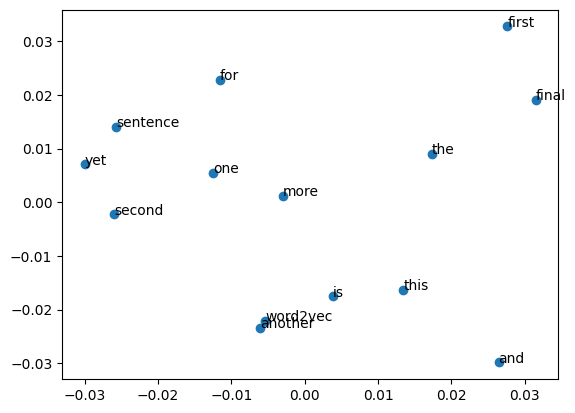

In [44]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index.keys())
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()



# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Devendarreddybathini/Devendarreddy_INFO5731_spring2023/blob/main/movie_reviews_sentiment.csv



